# Comparison of Solutions for Markov Decision Processes

## Introduction

Markov Decision Processes (MDPs) provide a mathematical formulation for stochastic sequential decision making. Stochastic sequential decision making is prominent in fields such as economics, control systems, urban planning, and communications [Puterman]. 

In this project, we will be comparing a variety of classic dynamic programming and linear programming methods to solve MDPs. From the dynamic programming realm, the solution methods are:
-  Value Iteration
-  Policy Iteration

and for linear programming methods:
-  First order methods
    -  Projected Gradient Method
    -  Projected Accelerated Gradient Method
-  Barrier Method
-  Simplex method
-  CVXPY toolset (SCS, ECOS, CVXOPT)


## Problem Formulation
$\textbf{Definition 1:}$ A Markov decision process (MDP) is a tuple $\mathcal{M}=(S,s_0,A,P)$ where $S$ is the finite set of states, i.e., $|S|=n$, $s_0\in S$ is the initial state, $A$ is the finite set of actions, i.e. $|A|=a$, and $P: S\times A \rightarrow[0,1]^{n}$ is the transition function. For any given $(s,a)$, $P$ satisfies $\sum_{t\in S}P(t| s,a)=1$ and $P(t | s,a)\geq 0$. Assume for simplicity that all actions are available in all states.

An infinite run from the initial state $s_0$ is a sequence $\rho$$=$$s_0a_0s_1a_1s_2...$ of states and actions such that for all $k\geq 0$, we have $P(s_{k+1}|s_k,a_k)$$>$$0$. A policy specifies a procedure for action selection in each state depending on the history of states and actions. A deterministic policy is a function $\pi : S \rightarrow A$ that maps the set of states into the set of available actions for the input state. For a given MDP $\mathcal{M}$, we denote the set of all possible deterministic policies by $\Pi(\mathcal{M})$.

To define a reward maximization problem, we relate each state transition with a real valued reward, using the reward function $r : S\times A\times S \rightarrow \mathbb{R}$. Then, the expected total reward of an infinite horizon decision process following the policy $\pi$ is given as follows,

$\begin{align}
V^{\pi}(s)=\lim_{N\rightarrow \infty}\mathbb{E}\Big[\sum_{k=0}^{N-1}\alpha^kr(s_i,\pi(s),s_{i+1}) \ \Big| \ i_0=s_0\Big]
\end{align}$ $\forall s\in S$

where $V^{\pi}(s)$ is the value of state $s$ under the policy $\pi$. 


Suppose that our aim is to find a policy that maximizes the expected total reward. The Bellman equation and optimality conditions provide the following formulation to compute maximum values for states and corresponding actions which achieves the maximum reward values,

$\begin{align}
V^{\star}(s)&=\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\pi^{\star}(s)&=\arg\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\end{align}$

Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ be an operator defined as,

$(TV)(s)=\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V(t)\Big]$.

Then, the optimality condition is given by $TV^{\star}=V^{\star}$. Additionally, from well known results, $T$ is a monotone operator and a contraction mapping. Hence, it satisfies that (i) for any $V$ satisfying $V\geq TV$, $V\geq V^{\star}$ where inequalities are elementwise, (ii) it has a unique solution to $V^{\star}=TV^{\star}$ . Using this fact, and defining $r(s,a)=\sum_{t\in S}P(t \ | \ s,a)r(s,a,t)$, we can formulate finding the maximum expected reward problem as a linear program as following,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & V(s)\geq r(s,a)+\alpha\sum_{t\in S}P(t \ | \ s,a)V(t)
\end{align}$

where $c\in\mathbb{R}_{++}^n$. Having $c>0$ for each state ensures the uniqueness of the solution. Let $P_{a_1}\in[0,1]^{n\times n}$ be a transition matrix for action $a_1$. We define the following matrices,

$\begin{align}
A=\begin{bmatrix}
I_{n\times n}-\alpha P_{a_1}\\
I_{n\times n}-\alpha P_{a_2}\\
...\\
I_{n\times n}-\alpha P_{a_a}
\end{bmatrix}
\end{align}$ ,
$\begin{align}
b=\begin{bmatrix}
r(s_1,a_1),&
r(s_2,a_1),&
...,&
r(s_n,a_1),&
r(s_1,a_2),&
...,&
r(s_n,a_2),&
...,&
r(s_1,a_a),&
...,&
r(s_n,a_a)
\end{bmatrix}^T
\end{align}$.

Then the problem becomes,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & AV\geq b
\end{align}$

#### Dual Program

The Lagrangian for the primal problem is given by,

$\begin{align}
\mathcal{L}(V,\lambda)=c^TV+\lambda^T(b-AV)
\end{align}$
where the dual variable $\lambda\in\mathbb{R}^{na}$. Hence, the dual problem is,

$\begin{align}
\max & \ \ \lambda^Tb\\
\text{Subject to} :&\ \  A^T\lambda-c=0\\
&\ \  \lambda\geq 0
\end{align}$,
or writing explicitly,  


$\begin{align}
\max & \ \ \sum_{a\in A}\sum_{s\in S}\lambda(s,a)b(s,a)\\
\text{Subject to} :&\ \  \sum_{a\in A}\lambda(s,a)-\alpha\sum_{t\in S}\sum_{a\in A}P(s \ | \ t,a)\lambda(t,a)=c(s)\ \ \ \forall \ \ s\in S\\
&\ \  \lambda(s,a)\geq 0\ \ \ \forall s\in S, \ \ a\in A
\end{align}$

where $\lambda(s,a)$ variables intuitively represent the expected residence time in a state action pair. Although the deterministic policies are at least as good as randomized policies for examples we are going to use, note that the use of dual program provides an efficient way to extract the randomized policies from the output. Using the dual program, the optimal policy for each state can be obtained by using,

$\begin{align}
P(a \ | \ s)= 
\begin{cases} \frac{\lambda(s,a)}{\sum_{a\in A}\lambda(s,a)}& \text{if} \sum_{a\in A}\lambda(s,a)\neq 0\\
\text{arbitrary} & \text{if} \sum_{a\in A}\lambda(s,a)= 0\end{cases}
\end{align}$

In [1]:
# Required Packages

import numpy as np
import math as m
import time
import numpy.linalg as la
from scipy.optimize import linprog
import numpy.random as rn
import matplotlib.pyplot as plt
from cvxpy import *
import cvxpy as cvx

## Generating the MDP
First, we use grid world examples to compare the performance of various methods in terms of scalability and required number of iterations to satisfy the desired error bounds on the state values. The following code generates an (n,m) grid world and allows the agent to choose between five possible actions in each state, namely left, right, up, down and stay. Once the agent chooses an action, the next state is determined stochastically.

Second, we use a randomly generated MDP to compare the performance of the same algorithms when used with large number of available actions. Note that having large number of actions does not change the number of variables but increases the number of constraints in the primal problem. 

### Grid World Transitions

In [2]:
# This is the grid world generator with 5 possible actions for the agent i.e. (left,right,up,down,loop).
# Inputs:
# Row: Number of rows of the grid world
# Col: Number of columns of the grid world
# Prob: Probability of taking the desired action
# Output:
# P_0: Transition matrix with dimensions 5 x (Row x Col) x (Row x Col)  

# When an action is chosen by the agent, it is performed with probability Prob and the remaining (1-Prob) probability
# is distributed among other actions. This property is included to introduce stochasticity.
# Output matrix is formed in a way that 0th row of the matrix represent transitions from the  bottom left corner 
# of the grid world. Similarly, the last row is for the upper right corner ((Row x Col)th grid).

def Grid_world(Row,Col,Prob):
    State=Row*Col
    Actions=5
    np.random.seed(0)
    prob=Prob
    P_0=np.zeros((Actions,State,State))
    #action left
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
            else:
                P_0[0,i,i]=(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
    # action right
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[1,i,i]=prob+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
            else:
                P_0[1,i,i]=(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
                P_0[1,i,i+Col]=(1-prob)/4
    # action up
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-Col:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-1:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i+Col]=prob
            elif i>(Row-1)*Col and i<State-1:
                P_0[2,i,i]=prob+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
            else:
                P_0[2,i,i]=(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
                P_0[2,i,i+Col]=prob
    # action down
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==0:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==Col-1:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i>0 and i<Col-1:
                P_0[3,i,i]=prob+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
            else:
                P_0[3,i,i]=(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
                P_0[3,i,i+Col]=(1-prob)/4
    # action loop
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
            else:
                P_0[4,i,i]=prob
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
    return P_0

#### Randomly Generated MDP

In [31]:
# This code generates a random MDP using given number of states and actions.
# Inputs:
# numOfStates: Number of states of MDP
# numOfActions: Number of actions for all states
# Output:
# P_0: Probability matrix with dimension (a x s x s)

#It is assumed that all actions are active in all states. Number of possible transitions for each state 
#action pair is determined using uniform distribution. Then, transition probabilities are determined 
#using uniform distribution and normalized afterwards.


def randomMDP(numOfStates, numOfActions):
    np.random.seed(1)
    P_0=np.zeros((numOfActions,numOfStates,numOfStates))
    for act in range(numOfActions):
        for i in range(P_0.shape[1]):
            outgoingNum = 1 + np.random.randint(numOfActions, size=1);
            outgoingStateList = np.random.choice(numOfStates, outgoingNum, replace=False)
            probs = np.random.rand(outgoingNum[0])
            probs = probs/sum(probs)
            for j in range(outgoingNum[0]):
                P_0[act, i, outgoingStateList[j]] = probs[j]

    return P_0

### Problem Formulation and Constraints for the Linear Program

The below functions build the constraint matrices defined in the introduction for several cases. In addition to these constraints, we need to add an additional constraint for projected gradient, accelerated projected gradient and barrier methods. Barrier methods utilize the closed convex constraint sets to determine the analytical center and gradient methods utilize analytical center as an initial point. The gradient methods are not required to use these extra constraints, otherwise. The additional constraint which apply an upper bound to state values is defined as,

$ \begin{align}
V(s) \leq \frac{\underset{ s',a}{\max}(r(s',a,t))}{1-\alpha} +c ,\forall s \in S, \ s', t \in S, \ a \in A, \ c \geq 0
\end{align}$

The upper bound is derived as follows,
 
$\begin{align}
V^{\star}(s_{max})&=\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big] 
\\
&\leq \max_{a}\sum_{t\in S}P(t \ | \ s,a) \Big[r(s,a,t)+\alpha V^{\star}(s_{max})\Big]
\\
&\leq \max_{a}\sum_{t\in S}P(t \ | \ s,a) \Big[ \Big[ \underset{s',a'}{\max}r(s',a',t) \Big] +\alpha V^{\star}(s_{max})\Big]
\\
&\leq \Big[ \Big[ \underset{s',a'}{\max}r(s',a',t)  \Big] +\alpha V^{\star}(s_{max})\Big]
\end{align}$

where $V^{\star}(s_{max})$ is the largest state value and $\left(\underset{s',a'}{\max}r(s',a',t)\right)$ is the largest reward amongst all state action pairs.

Thus it can be concluded that

$\begin{align}
V^{\star}(s) \leq V^{\star}(s_{max}) \leq  \frac{\underset{s',a}{\max} r(s',a,t)}{1- \alpha}, \forall s \in S.
\end{align}$


In [27]:
# Given a grid world, the following code generates constraints for the primal linear program
# Inputs:
# rows: Number of rows of the grid world
# columns: Number of columns of the grid world
# prob: Probability of taking the desired action
# discount: Discount factor
# tolerance: Desired tolerance 

# Output:
# A: Rearranged probability matrix constraint
# b: Bounds
# c: Coefficients for decision variables
# P_0: Transition matrix with dimensions 5 x (Row x Col) x (Row x Col)

# The primal problem is 
# min   c^T x
# s.t.  Ax>= b

def Primal_parameters_1(rows,columns,prob,reward,discount,tolerance):
    States=rows*columns
    P_0=Grid_world(rows,columns,prob)
    A=np.zeros((5*States,States)) # 5 is number of actions !
    b=np.zeros((5*States,1))
    # initial distributions USE 1 for each state to ensure the converge to the unique solution!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(5):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(P_0.shape[0]):
        b[a*States:(a+1)*States]=reward
    return A,b,c,P_0

# The following code adds additional constraints to bound the polytope above. It is used to find an analytical center 
# for interior point methods and also a starting point for gradient methods

def Analytic_center_bounds(rows,columns,prob,reward,discount,tolerance):
    States=rows*columns
    P_0=Grid_world(rows,columns,prob)
    A=np.zeros((5*States,States)) # 5 is number of actions !
    b=np.zeros((5*States,1))
    # initial distributions USE 1 for each state to ensure the converge to the unique solution!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(5):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(P_0.shape[0]):
        b[a*States:(a+1)*States]=reward
    bound=np.max(b)/(1-discount)+100
    dum=-np.eye(States)
    dum2=-bound*np.ones((States,1))
    A=np.concatenate((A,dum),axis=0)
    b=np.concatenate((b,dum2),axis=0)
    return A,b,c,P_0

# Given a primal LP, the following function outputs constraints for the dual problem

# Input:
# A: Probability matrix constraint
# b: Bounds
# c: Coefficients for decision variables

# Output:
# A.T: Rearranged probability matrix constraint
# b: bounds
# c: coefficients for decision variables

# The dual problem is 
# max b^T y
# s.t. A^T y = c
#      y>=0

def Dual_parameters_1(A,b,c):
    return A.T,b,c


# The following code generates constraints for the random MDP input
# Inputs and outputs are the same with minor changes as explained above 
def Primal_parameters_2(P_0, discount, reward):
    actions=P_0.shape[0]
    States=P_0.shape[1]
    A=np.zeros((actions*States,States)) # 5 is number of actions !
    b=np.zeros((actions*States,1))
    # initial distributions USE 1 for each state to ensure the converge to the unique solution!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(actions):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(actions):
        b[a*States:(a+1)*States]=reward
    return A,b,c

def Analytic_center_bounds2(P_0, discount, reward):
    actions=P_0.shape[0]
    States=P_0.shape[1]
    A=np.zeros((actions*States,States)) # 5 is number of actions !
    b=np.zeros((actions*States,1))
    # initial distributions USE 1 for each state to ensure the converge to the unique solution!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(actions):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(actions):
        b[a*States:(a+1)*States]=reward
    bound=np.max(b)/(1-discount)+100
    dum=-np.eye(States)
    dum2=-bound*np.ones((States,1))
    A=np.concatenate((A,dum),axis=0)
    b=np.concatenate((b,dum2),axis=0)
    return A,b,c

## Methods 
The following codes are methods we use to solve 'given an MDP and a reward structure, find the optimal state values and policies achieving it' problem. First, we find the optimal states values and a policy achieving it by the policy iteration algorithm. Then using its results, we keep the log of relative error values of each iteration for other methods. The elapsed time when using different methods are all measured using 'time.time()' function. 

We also solve the dual problem using different methods

### 1) Value Iteration
Value iteration is an application of Dynamic Programming and it is one the most understood and used algortihms to solve MDPs. The algorithm starts with arbitrary initial values of states. Due to the discount factor any point can be used as an initial point. In an iteration, for each state it finds the best action which maximizes the state value, using the old state values. After all state values are recalculated, a new iteration starts with the updated state values. The algorithm terminates when the difference between old and updated state value are below a threshold. [PUTERMAN]


In [5]:
# The following function performs the value iteration algorithm
# Inputs:
# P: Probability matrix
# R: Reward vector for states
# discount: Discount factor
# optimal: Optimal value vector to compute error per iteration
# eps: tolerance 

# Outputs:
# stateVals: Value vector for states
# bestAction : Action vector for states achieving the optimal value
# error : Error values for each iteration
# num_iter : Required number of iterations
# elapsed_time : Elapsed time during the computation

def valitr(P, R, discount, optimal,eps):
    start_time = time.time()
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    stateVals = np.zeros(numOfStates)
    optimal = np.resize(optimal, stateVals.shape)
    bestAction = np.zeros(numOfStates)
    #df is the stopping criteria
    df = np.zeros(1)
    df[0] = 1
    num_iter=0
    error = []
    while la.norm(df,2) > eps:
        stateValsNew = np.zeros(P.shape[2])
        num_iter+=1
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(stateVals[successors], np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestAction[s] = bestActOfs
            stateValsNew[s] = maxVal;
        #update the state values and continue
        df = stateValsNew - stateVals
        stateVals = stateValsNew
        error.append(la.norm(stateVals - optimal, 2))
        
    stateVals = np.resize(stateVals, (numOfStates,1))
    elapsed_time = time.time() - start_time
    return stateVals, bestAction, error, num_iter, elapsed_time

### 2) Policy Iteration

Policy iteration is a well-known method to solve infinite horizon MDPs, which are known to have a stationary policy to maximize the objective function. The algorithm starts with an arbitrary deterministic policy, which induces a Markov Chain, or, in other words, each state brings only one constraint. After a policy is generated, it is evaluated to determine the new state values, which is subsequently used to determine the best actions and a new policy is generated. The new policy is generated such that it maximizes the state values of the new state values. The policy iteration algorithm terminates when the policy converges, i.e., the previous policy is identical to the current policy. [PUTERMAN] 

The main difference between this method and value iteration method is that value iteration method uses the old state values to update state values and relies on the convergence of state values, policy iteration method analytically calculates the state values at each step. Analytical computation of state values has complexity,$O(n^3)$, and causes problems when the number of states is relatively high.

In [6]:
# The following function performs the policy iteration algorithm
# Inputs:
# P: Probability matrix
# R: Reward vector for states
# discount: Discount factor
# eps: tolerance

# Outputs:
# stateVals: Value vector for states
# bestActionNew : Action vector for states achieving the optimal value
# error : Error values for each iteration
# num_iter : Required number of iterations
# elapsed_time : Elapsed time during the computation

def policyitr(P, R, discount, eps):
    start_time = time.time()
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    bestActionOld =  -1*np.ones(numOfStates)
    bestActionNew = np.random.randint(numOfActions, size=numOfStates)
    stateVals = np.zeros([numOfStates, 1]);
    vals = []; #to keep state values;
    #stops if the last two polies are same or
    df = np.zeros(1)
    df[0] = 1
    num_iter=0
    while not(np.array_equal(bestActionOld, bestActionNew) or la.norm(df,2) < eps):
        num_iter+=1
        bestActionOld =np.copy(bestActionNew);
        #constructs linear equation to find new values of states
        A = np.zeros([numOfStates, numOfStates])
        #if there are rewards for actions this line must be changed
        b = R;
        b.resize([numOfStates,1])
        for s in range(numOfStates):
            ts = discount*P[bestActionNew[s],s,:];
            ts.resize([1,numOfStates]);
            A[s,:] = -ts;
        #update the state values and continue
        A = A + np.identity(numOfStates);
        stateValsNew = np.linalg.solve(A,b);
        df = stateValsNew-stateVals;
        stateVals = stateValsNew
        vals.append(stateVals)
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(np.squeeze(stateVals[successors]), np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestActionNew[s] = bestActOfs
    error = []
    for i in range(len(vals)):
        error.append(np.linalg.norm(vals[i] - vals[-1], 2))
    elapsed_time = time.time() - start_time
    return stateVals, bestActionNew, error, num_iter, elapsed_time

### 3) CVXPY Solvers for the primal problem

In [47]:
# The following functions solve the primal problem

# It take constraints and a tolerance value as input, and computes optimal value vectors 
# using different solvers in CVXPY
def ECOS_Primal(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=ECOS,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def SCS_Primal(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=SCS,eps=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def CVXOPT_Primal(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=CVXOPT,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value ,Y.value, elapsed_time

### 4) CVXPY Solvers for the dual problem

In [8]:
# The following functions solve the dual problem

# It take constraints and a tolerance value as input, and computes optimal value vectors 
# using different solvers in CVXPY

def ECOS_Dual(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    print(A.shape)
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=ECOS,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def SCS_Dual(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=SCS,eps=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def CVXOPT_Dual(A,b,c,tol):
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    start_time = time.time()
    prob.solve(solver=CVXOPT,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time

### 5) Simplex Method
The simplex method attempts to find the optimal solution by starting at a feasible extreme point and then following the edges until it reaches a point that is optimal. Each extreme point that the simplex method travels down will improve or not change the objective function. We use scipy.optimize.linalg function to obtain results for simplex method.

### 6) First Order Methods
Both gradient descent and accelerated gradient methods require a projection such that the solution is a feasible point in the constraining set. Due to the nature of the linear program, the constraining set is a set of $ (n \cdot m \cdot a)$ affine inequalities $ Ax \geq b$. A projection onto this constraining set is difficult, and so an approximate method called alternating projection method.

The alternating projection method was originally applied to a set of affine constraints by von Neumann, but can be extended to this problem utilizing a relxation method. The method finds all of the affine inequalities that are violated by the current value $z$, and for those inequality constraints determines the projection onto the individual half-space defined by the constraint. For the constraints that are not violated, the projection is just $z$. 

In [61]:
# The following function projects the variable vector to the constraint set
# Inputs: 
# y: Decision variable
# A: Constraint matrix
# b: Constraint vector

# Reminder: Problem is
# min c^T y
# s.t. Ax>=b
def proj(y, A, b):
    x = y
    maxIter = 1000
    j = 0
    while np.min(np.dot(A,x) - b) < 0 and j <= maxIter:
        # find the constraints that are violated
        constrainedBool = np.greater_equal(np.dot(A, x), b)
        
        # for each violated constrained perform the projection
        for i in range(constrainedBool.shape[0]):
            if not np.all(constrainedBool[i]):
                # intermediate residual
                qq=(b[i] - np.dot(A[i,:], x))
                
                # projection
                x = x + np.reshape(qq[0]*A[i,:]/np.dot(A[i,:].T, A[i,:]), (x.shape[0],x.shape[1]))
        # iteration counter
        j = j + 1
    return x

#### 6.1)Projected Gradient Descent
Projected gradient descent updates the state values and then projects the state values onto the constraining set using the above projection.

In [10]:
def graddes(x, A, b, t, eta0):
    eta = eta0/np.sqrt(t + 1)
    # gradient is always a vector of ones of shape x.shape
    grad = np.ones((x.shape[0], 1))
    y = x - eta*grad

    x = proj(y, A, b)

    return x

#### 6.2)Projected Accelerated Gradient Method
The accelerated gradient method performs the same general algorithm as projected gradient descent, however, accelerated gradient method uses the "momentum" of the gradient update to nudge the new solution in the same direction of the gradient. Accelerated gradient methods have faster convergence rates than gradient descent methods. 

In [11]:
def accelgrad(x, v, theta, A, b, t, eta0):
    eta = eta0/np.sqrt(t+1)
    grad = np.ones(x.shape)
    
    v = v - eta*grad
    
    theta_old = theta
    theta = (1 + np.sqrt(1 + 4*theta**2))/2
    
    xprev = x
    x = proj(v, A, b)
    
    v = x + (theta_old - 1)/(theta)*(x - xprev)
    
    return x, v, theta

In [12]:
def descent(update, update_name, x, A, b, eta0, tol, optVal, T=int(1e4)):
    v = x
    theta = 1.
    error = []
    
    t = int(0)
    xnew = x + 1;
    while t <=  T and la.norm(x - xnew, 2) > tol:
        x = xnew
        if update_name == "gradient":
            xnew = update(x, A, b, t, eta0)
            
        elif update_name == "accelerated":
            xnew, v, theta = update(x, v, theta, A, b, t, eta0)
            
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(x - optVal,2))
        t = int(t + 1)
    
    return x, error, t

### 7) Interior Point Method (Barrier Method)

Barrier Method is an Interior Point Method to solve convex optimization problems with inequality constraints. In Barrier method, the constarints are added to the main problem as an extra function. This extra function goes to infinity when the optimized variable gets closer to the boundaries of the convex set i.e. it encourages the variable to stay in the feasible region. The algorithm starts from the analytical center which minimizes the barrier function. As the number of iterations increases, the original function becomes comparable with the barrier function and the optimized variable gets closer to the boundaries more. In this project the barrier function is chosen to be logarithmic. 

As previously mentioned Barrier Method needs additional contraints to solve MDPs. In the absence of these constraints, the intersection of hyperspaces are not bounded and the log barrier function is maximized at infinity. A reasonable analytical center can be obtained by bounding the space i.e. converting the domain into a polytope. The analytical center of the polytope is obtained by SCS solver and the central path is found by Newton method.

In [13]:
def findBarrierGradient(A,b,x):
    #calculates the gradient of barrier function for IPM Ax>=b
    g = np.zeros(A.shape[1])
    for i in range(A.shape[0]):
        g = g - A[i,:]/(np.dot(A[i,:],x) - b[i])
    g = np.resize(g, x.shape)
    return g

In [14]:
def findBarrierHessian(A,b,x):
    H = np.zeros([A.shape[1], A.shape[1]])
    for i in range(A.shape[0]):
        H = H + np.outer(A[i,:], A[i,:])/(np.dot(A[i,:],x) - b[i])**2
    return H

In [15]:
def findAnalyticCenter(A,b,xFeasible,T):
    #finds the analytical center for IPM using CVXPY
    xFeasible=np.resize(xFeasible,(A.shape[1],1))
    Y=cvx.Variable(A.shape[1])
    dum=0
    for i in range(A.shape[0]):
        dum+=cvx.log(cvx.sum_entries(cvx.mul_elemwise(A[i,:],Y))-b[i])
    obj=cvx.Minimize(-dum)
    prob=cvx.Problem(obj)
    prob.solve(solver=SCS,eps=tol,max_iters=100,verbose=False)
    return Y.value

In [16]:
def findOptimalSolution(A,b,stateValsNew,alpha,eps, stateValsOpt,t):
    #finds the optimal solution using IPM
    error = []
    #to make it enter the loop
    stateVals = stateValsNew + 1;
    itr = 0;
    while (np.linalg.norm(stateVals-stateValsNew,2) > eps):
        dec = 1
        while(dec > 100*eps):
            itr+=1
            stateVals = stateValsNew
            #Finds the gradient and hessian
            g = t*np.ones([stateVals.size, 1]) + findBarrierGradient(A,b,stateVals)
            H = findBarrierHessian(A,b,stateVals)
            #Updates the values
            stateValsNew = stateVals - np.dot(np.linalg.inv(H),g)
            error.append(np.linalg.norm(stateValsNew - stateValsOpt,2))
            dec = 1/2*np.dot(np.transpose(g),np.dot(np.linalg.inv(H),g))
        t = t*(1+alpha)
        if np.isnan(error[-1]):
                return stateVals , error
    return stateVals, error


In [17]:
def interiorPoint(A, b, discount, eps, alpha, stateValsOpt,t):
    #finds another feasible point using the optimal solution
    xFeasible = stateValsOpt +1;
    #finds analytical center
    start_time = time.time()
    xF = findAnalyticCenter(A,b,xFeasible,1000);
    stateVals, error = findOptimalSolution(A,b,xF,alpha,eps, stateValsOpt,t)
    elapsed_time = time.time() - start_time
    return stateVals, error, elapsed_time

In [90]:
def plotGridWorld(Vals, bestAction, Rows, Columns,cbarlabel):
    imgData = np.resize(Vals,[Rows, Columns]);
    imgData = np.flipud(imgData);    
    plt.imshow(imgData, interpolation='nearest')
    bestAction = np.resize(bestAction,[Rows, Columns])
    for a in range(Rows):
        for b in range(Columns): 
            if bestAction[Rows -1 - a,b]== 0:
                plt.text(b,a ,r'$ \leftarrow $')
            elif bestAction[Rows -1 - a,b]== 1:
                plt.text(b,a,r'$ \rightarrow $')
            elif bestAction[Rows -1 - a,b]== 2:
                plt.text(b,a,r'$ \uparrow $')
            elif bestAction[Rows -1 - a,b] == 3:
                plt.text(b,a,r'$ \downarrow $')
            elif bestAction[Rows -1 - a,b] == 4:
                plt.text(b,a ,r'$ o $')
            #plt.text(b,a,r'$ \leftarrow $')
            
    cbar = plt.colorbar()
    cbar.set_label(cbarlabel)
    plt.show()
def Grid_Map(R, Rows, Columns,cbarlabel):
    imgData = np.resize(R,[Rows, Columns]);
    imgData = np.flipud(imgData);    
    plt.imshow(imgData, interpolation='nearest')
    cbar = plt.colorbar()
    cbar.set_label(cbarlabel)
    plt.show()
def Plots(policy,value,interior,proj,acc):
    plt.figure()
    plt.yscale('log')
    plt.plot(range(len(policy)), policy,label='Policy It.')
    plt.plot(range(len(value)), value,label='Value It.')
    plt.plot(range(len(interior)), interior,label='Interior')
    plt.plot(range(len(proj)), proj,label='Proj Grad')
    plt.plot(range(len(acc)), acc,label='Acc. Proj Grad')
    plt.legend()
    plt.ylabel('Error value (Log Scale)')
    plt.xlabel('Number of Iterations')
    plt.show()
def Plots2(policy,value,interior):
    plt.figure()
    plt.yscale('log')
    plt.plot(range(len(policy)), policy,label='Policy It.')
    plt.plot(range(len(value)), value,label='Value It.')
    plt.plot(range(len(interior)), interior,label='Interior')
    plt.legend()
    plt.ylabel('Error value (Log Scale)')
    plt.xlabel('Number of Iterations')
    plt.show()

## Examples

### 1) 4 x 4 Grid World
In the first example we use a 4 by 4 grid world example to compare the required number of iterations for different methods to achieve a desired tolerance level. Tolerance is in terms of the norm difference between last two iterations of algorithms. The agent starts from the bottom left grid and its aim is to reach the top left grid while avoiding some of the intermediate grids. We solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, (5) projected gradient descent, (6) accelerated projected gradient descent and (7) interior point (log barrier) method. We assume that the agent takes the chosen action with probability 0.8, and we use the discount factor of 0.9. The desired tolerance is $10^{-7}$.

###### i) Primal Problem
The primal problem has 16 variables and 80 constraints. The first figure shows the reward values assigned to grids. The aim of the agent is to reach (3,0)th grid by starting from (0,3)th grid while maximizing its reward. We provide the resulting policy obtained by policy iteration when the primal problem is used. We compare the methods in terms of the required number of iterations and the elapsed time (measured by time.time() function). Additionally, we include error vs. iteration plots for some of the methods. The error values measure how far the solution vector is from the optimal result. We use the results of policy iteration algorithm as reference.

Note: We use the analytical center as the starting point for projected gradient methods.

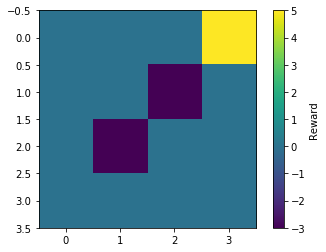

In [136]:
rows,columns,prob,discount,tol=4,4,0.8,0.9,1e-7 # Parameters for the example
reward=np.zeros((rows*columns,1))
reward[5],reward[10],reward[15]=-3,-3,5
A,b,c,P_0=Primal_parameters_1(rows,columns,prob,reward,discount,tol) # Compute constraints
A_c,b_c,c_c,P_0_c=Analytic_center_bounds(rows,columns,prob,reward,discount,tol) # Compute constraints
Grid_Map(b[0:P_0.shape[1]], rows, columns,'Reward')

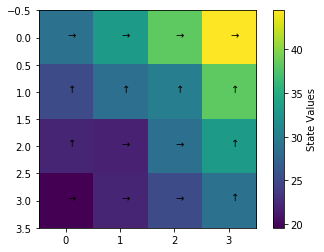

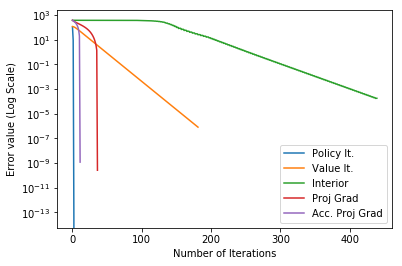

In [137]:
polyit_val, bestAction2,error_pol, num_iter_pol, time_pol = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
valit_val, bestAction,error_val, num_iter_val, time_val = valitr(P_0, b, discount,polyit_val, tol) # Value Iteration
start_time = time.time()
res = linprog(c_c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 10000}) # Simplex
elapsed_time_simplex = time.time() - start_time
obj_ecos_p, ecos_val_p, time_ecos_p=ECOS_Primal(A,b,c,tol) # ECOS Primal
obj_scs_p, scs_val_p, time_scs_p=SCS_Primal(A,b,c,tol) # SCS Primal
obj_cvx_p, cvx_val_p, time_cvx_p=CVXOPT_Primal(A,b,c,tol) # CVXOPT Primal
plotGridWorld(polyit_val, bestAction2, rows, columns,'State Values')
analytical_vals=findAnalyticCenter(A_c,b_c,valit_val+10,T=1000)
start_time = time.time()
projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", analytical_vals, A, b, 10, tol, polyit_val) # Projected Gradient
elapsed_time_projgrad = time.time() - start_time
start_time = time.time()
accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", analytical_vals, A, b, 10, tol, polyit_val) # Accelerated Gradient Descent
elapsed_time_accgrad = time.time() - start_time
interior_val, interior_error, elapsed_int=interiorPoint(A_c, b_c, discount, tol, 0.15, polyit_val,1e-7) # Interior Point Method
Plots(error_pol,error_val,interior_error,projgrad_error,accgrad_error)

| Methods  | Number of Iterations | Elapsed Time (s) |Error ($\lVert  . \rVert_2$)  |
| ------------- | ------------- |------------ |-------- |
| Value Iteration  | 182  |0.32816 |8.197e-07 |
| Policy Iteration  | 4  |0.01521 |Reference |
| Simplex Method  | 39  |0.09414 |Failed |
| ECOS Solver  | 8  |0.00381 |1.197e-07 |
| SCS Solver  | 720  |0.03633 |5.337e-06 |
| CVXOPT Solver  | 7  |0.01729 |7.618e-07 |
| Barrier Method  | 101  |0.83292 |1.794e-04 |
| Projected Gradient Descent | 37 | 19.46743 |2.593e-10 |
| Acc Projected Gradient Descent  | 12 |5.45143 |1.184e-09 |

###### ii) Dual Problem
The dual problem has 80 variables and 96 constraints. We solve the dual problem using (1) simplex method and (3) cvxpy with SCS,ECOS and CVXOPT solvers. Additionally, we provide the resulting policy obtained by cvxopt solver (without state values on the graph). The methods are compared in terms of the required number of iterations and the elapsed time (measured by time.time() function). 

(16, 80)


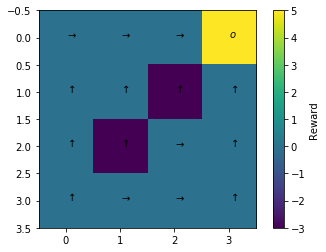

In [95]:
A_p,b_p,c_p=Dual_parameters_1(A,b,c)
obj_ecos_d, ecos_val_d, time_ecos_d=ECOS_Dual(A_p,b_p,c_p,tol) # ECOS Dual
obj_scs_d, scs_val_d, time_scs_d=SCS_Dual(A_p,b_p,c_p,tol) # SCS Dual
obj_cvx_d, cvx_val_d, time_cvx_d=CVXOPT_Dual(A_p,b_p,c_p,tol) # CVXOPT Dual
policy = np.zeros((A_p.shape[0],5))
for a in range(5):
    for i in range(A_p.shape[0]):
         policy[i,a]=cvx_val_d[a*P_0.shape[1]+i]
denum=np.sum(policy, axis=1)  
for i in range(A_p.shape[0]):
    for j in range(5):
        policy[i,j]=policy[i,j]/denum[i]
policy=np.argmax(policy,axis=1)
plotGridWorld(b[0:P_0.shape[1]], policy, rows, columns,'Reward')
b_pp=np.reshape(b_p,(b_p.shape[0],))
c_pp=np.reshape(c_p,(c_p.shape[0],1))
eye=np.eye(A_p.shape[1])
zeros=np.zeros((A_p.shape[1],1))
start_time = time.time()
res = linprog(-b_pp, -eye, zeros, A_eq=A_p, b_eq=c_pp, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time_simplex = time.time() - start_time


| Methods  | Number of Iterations | Elapsed Time (s) | 
| ------------- | ------------- |------------ | 
| Simplex Method  | 29  |0.03769 | 
| ECOS Solver  | 7  |0.00474 | 
| SCS Solver  | >1000  |0.01352 | 
| CVXOPT Solver  | 7  |0.01593 |


### 2)  5 x 5 Grid World
Now we are going to show that even with a slight increase in the number of states, some of the methods fail. In this example, we use a 5 by 5 grid world example. Again, we solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, (5) projected gradient descent, (6) accelerated projected gradient descent and (7) interior point (log barrier) method. We assume that the agent takes the chosen action with probability 0.8, and we use the discount factor of 0.9. The desired tolerance is $10^{-7}$. Tolerance is in terms of the norm difference between last two iterations.

##### i) Primal Problem
The primal problem has 25 variables and 125 constraints. The first figure shows the reward values assigned to grids. The aim of the agent is to reach (2,1)th grid by starting from (0,4)th grid while maximizing its reward. We provide the resulting policy obtained by policy iteration when the primal problem is used. We compare the methods in terms of the required number of iterations and the elapsed time (measured by time.time() function). Additionally, we include error vs. iteration plots for some of the methods. Error values are norm difference between the results of policy iteration and the methods.

Note: We use the analytical center as the starting point for projected gradient methods.

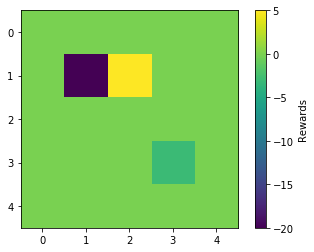

In [106]:
rows,columns,prob,discount,tol=5,5,0.8,0.9,1e-7 # Parameters for the example
reward=np.zeros((rows*columns,1))
reward[8],reward[16],reward[17]=-3,-20,5
A,b,c,P_0=Primal_parameters_1(rows,columns,prob,reward,discount,tol) # Compute constraints
A_c,b_c,c_c,P_0_c=Analytic_center_bounds(rows,columns,prob,reward,discount,tol) # Compute constraints
Grid_Map(b[0:P_0.shape[1]], rows, columns,'Rewards')

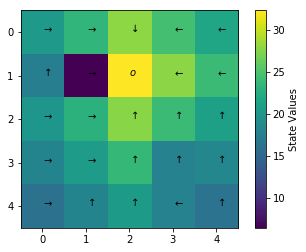

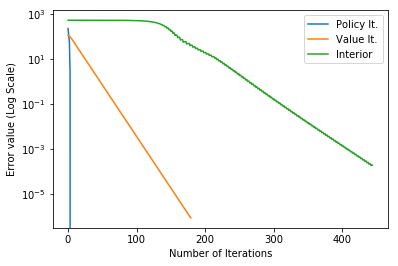

In [107]:
polyit_val, bestAction2,error_pol, num_iter_pol, time_pol = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
valit_val, bestAction,error_val, num_iter_val, time_val = valitr(P_0, b, discount,polyit_val, tol) # Value Iteration
start_time = time.time()
res = linprog(c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time_simplex = time.time() - start_time
obj_ecos_p, ecos_val_p, time_ecos_p=ECOS_Primal(A,b,c,tol) # ECOS Primal
obj_scs_p, scs_val_p, time_scs_p=SCS_Primal(A,b,c,tol) # SCS Primal
obj_cvx_p, cvx_val_p, time_cvx_p=CVXOPT_Primal(A,b,c,tol) # CVXOPT Primal
plotGridWorld(polyit_val, bestAction2, rows, columns,'State Values')
analytical_vals=findAnalyticCenter(A_c,b_c,valit_val+10,T=1000)
#start_time = time.time()
#projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", analytical_vals, A, b, 10, tol, valit_val) # Projected Gradient
#elapsed_time_projgrad = time.time() - start_time
#start_time = time.time()
#accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", analytical_vals, A, b, 10, tol, valit_val) # Accelerated Gradient Descent
#elapsed_time_accgrad = time.time() - start_time
interior_val, interior_error, elapsed_int=interiorPoint(A_c, b_c, discount, tol, 0.15, valit_val,1e-7) # Interior Point Method
Plots2(error_pol,error_val,interior_error)

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Value Iteration  | 180  |0.32816 |
| Policy Iteration  | 5  |0.01521 |
| Simplex Method  | 64  |0.06693 |
| ECOS Solver  | 10  |0.00454 |
| SCS Solver  | >1000  |0.01903 |
| CVXOPT Solver  | 8  |0.01064 |
| Barrier Method  | 120  |0.83292 |
| Projected Gradient Descent | NA | NA |
| Acc Projected Gradient Descent  | NA |NA |

In [122]:
s=np.resize(res['x'],(ecos_val_p.shape))
print(la.norm(s-ecos_val_p,2))

1.13280165066e-06


###### ii) Dual Problem
The dual problem has 80 variables and 96 constraints. We solve the dual problem using (1) simplex method and (3) cvxpy with SCS,ECOS and CVXOPT solvers. Additionally, we provide the resulting policy obtained by cvxopt solver (without state values on the graph). The methods are compared in terms of the required number of iterations and the elapsed time (measured by time.time() function). 

(25, 125)


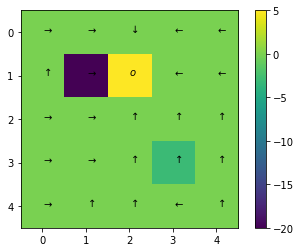

In [58]:
A_p,b_p,c_p=Dual_parameters_1(A,b,c)
obj_ecos_d, ecos_val_d, time_ecos_d=ECOS_Dual(A_p,b_p,c_p,tol) # ECOS Dual
obj_scs_d, scs_val_d, time_scs_d=SCS_Dual(A_p,b_p,c_p,tol) # SCS Dual
obj_cvx_d, cvx_val_d, time_cvx_d=CVXOPT_Dual(A_p,b_p,c_p,tol) # CVXOPT Dual
policy = np.zeros((A_p.shape[0],5))
for a in range(5):
    for i in range(A_p.shape[0]):
         policy[i,a]=cvx_val_d[a*P_0.shape[1]+i]
denum=np.sum(policy, axis=1)  
for i in range(A_p.shape[0]):
    for j in range(5):
        policy[i,j]=policy[i,j]/denum[i]
policy=np.argmax(policy,axis=1)
plotGridWorld(b[0:P_0.shape[1]], policy, rows, columns)
b_pp=np.reshape(b_p,(b_p.shape[0],))
c_pp=np.reshape(c_p,(c_p.shape[0],1))
eye=np.eye(A_p.shape[1])
zeros=np.zeros((A_p.shape[1],1))
start_time = time.time()
res = linprog(-b_pp, -eye, zeros, A_eq=A_p, b_eq=c_pp, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time_simplex = time.time() - start_time

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Simplex Method  | 29  |0.058204 |
| ECOS Solver  | 8  |0.00620 |
| SCS Solver  | >1000  |0.02538 |
| CVXOPT Solver  | 8  |0.02379 |

### 3) 20 x 20 Grid World
In this example we use a 20 by 20 grid world example to compare the scalability of different methods. Again, we solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, and (7) interior point (log barrier) method. We assume that the agent takes the chosen action with probability 0.8, and we use the discount factor of 0.9. The desired tolerance is $10^{-7}$.

###### i) Primal Problem
The primal problem has 400 variables and 2000 constraints. The first figure shows the reward values assigned to grids. We provide the resulting policy obtained by policy iteration when the primal problem is used. We compare the methods in terms of the required number of iterations and the elapsed time (measured by time.time() function). Additionally, we include error vs. iteration plots for some of the methods.


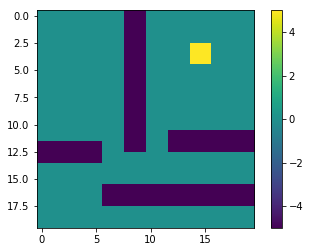

In [59]:
rows,columns,prob,discount,tol=20,20,0.8,0.9,1e-7 # Parameters for the example
reward=np.zeros((rows*columns,1))
reward[46:60],reward[66:80]=-5*np.ones((14,1)),-5*np.ones((14,1))
reward[120:126],reward[140:146]=-5*np.ones((6,1)), -5*np.ones((6,1))
reward[152:160],reward[172:180]=-5*np.ones((8,1)), -5*np.ones((8,1))
f=np.arange(148,408,20)
f2=np.arange(149,409,20)
reward[f],reward[f2]=-5*np.ones((13,1)),-5*np.ones((13,1))
reward[314:316],reward[334:336]=5*np.ones((2,1)),5*np.ones((2,1))
A,b,c,P_0=Primal_parameters_1(rows,columns,prob,reward,discount,tol) # Compute constraints
A_c,b_c,c_c,P_0_c=Analytic_center_bounds(rows,columns,prob,reward,discount,tol) # Compute constraints
Grid_Map(b[0:P_0.shape[1]], rows, columns)

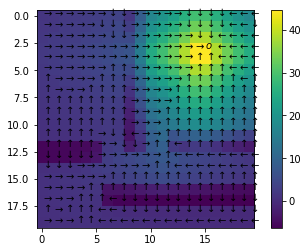

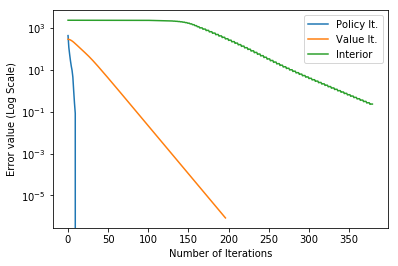

In [60]:
polyit_val, bestAction2,error_pol, num_iter_pol, time_pol = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
valit_val, bestAction,error_val, num_iter_val, time_val = valitr(P_0, b, discount,polyit_val, tol) # Value Iteration
start_time = time.time()
res = linprog(c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time_simplex = time.time() - start_time
obj_ecos_p, ecos_val_p, time_ecos_p=ECOS_Primal(A,b,c,tol) # ECOS Primal
obj_scs_p, scs_val_p, time_scs_p=SCS_Primal(A,b,c,tol) # SCS Primal
obj_cvx_p, cvx_val_p, time_cvx_p=CVXOPT_Primal(A,b,c,tol) # CVXOPT Primal
plotGridWorld(polyit_val, bestAction2, rows, columns)
analytical_vals=findAnalyticCenter(A_c,b_c,valit_val+10,T=1000)
#start_time = time.time()
#projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", analytical_vals, A, b, 10, tol, valit_val) # Projected Gradient
#elapsed_time_projgrad = time.time() - start_time
#start_time = time.time()
#accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", analytical_vals, A, b, 10, tol, valit_val) # Accelerated Gradient Descent
#elapsed_time_accgrad = time.time() - start_time
interior_val, interior_error, elapsed_int=interiorPoint(A_c, b_c, discount, tol, 0.15, valit_val,1e-7) # Interior Point Method
Plots2(error_pol,error_val,interior_error)

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Value Iteration  | 197  |5.57690 |
| Policy Iteration  | 11  |0.42219 |
| Simplex Method  | NA  |NA |
| ECOS Solver  | 22  |0.04432 |
| SCS Solver  | >1000  |0.72171 |
| CVXOPT Solver  | 15  |1.35374 |
| Barrier Method  | 124  |222.49 |
| Projected Gradient Descent | NA | NA |
| Acc Projected Gradient Descent  | NA |NA |

###### ii) Dual Problem
The dual problem has 2000 variables and 2400 constraints. We solve the dual problem using (1) simplex method and (3) cvxpy with SCS,ECOS and CVXOPT solvers. Additionally, we provide the resulting policy obtained by cvxopt solver (without state values on the graph). The methods are compared in terms of the required number of iterations and the elapsed time (measured by time.time() function). 

(400, 2000)


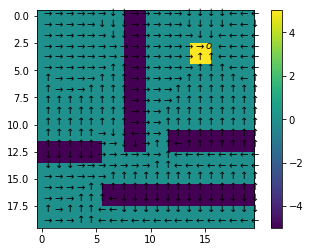

In [72]:
A_p,b_p,c_p=Dual_parameters_1(A,b,c)
obj_ecos_d, ecos_val_d, time_ecos_d=ECOS_Dual(A_p,b_p,c_p,tol) # ECOS Dual
obj_scs_d, scs_val_d, time_scs_d=SCS_Dual(A_p,b_p,c_p,tol) # SCS Dual
obj_cvx_d, cvx_val_d, time_cvx_d=CVXOPT_Dual(A_p,b_p,c_p,tol) # CVXOPT Dual
policy = np.zeros((A_p.shape[0],5))
for a in range(5):
    for i in range(A_p.shape[0]):
         policy[i,a]=cvx_val_d[a*P_0.shape[1]+i]
denum=np.sum(policy, axis=1)  
for i in range(A_p.shape[0]):
    for j in range(5):
        policy[i,j]=policy[i,j]/denum[i]
policy=np.argmax(policy,axis=1)
plotGridWorld(b[0:P_0.shape[1]], policy, rows, columns)
b_pp=np.reshape(b_p,(b_p.shape[0],))
c_pp=np.reshape(c_p,(c_p.shape[0],1))
eye=np.eye(A_p.shape[1])
zeros=np.zeros((A_p.shape[1],1))
start_time = time.time()
res = linprog(-b_pp, -eye, zeros, A_eq=A_p, b_eq=c_pp, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 10000}) # Simplex
elapsed_time_simplex = time.time() - start_time

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Simplex Method  | 761  |22.08202 |
| ECOS Solver  | 15  |0.05125 |
| SCS Solver  | >1000  |0.47717 |
| CVXOPT Solver  | 15  |8.32947|

### 4)  Random MDP
In this example, we use a randomly generated MDP with 100 states and 10 available actions at each state. The aim is to compare the performance of algorithms when the number of actions is large. As a result, the optimization problem has 100 variables and 1000 constraints. We solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, (5) projected gradient descent, (6) accelerated projected gradient descent and (7) interior point (log barrier) method. We assume a discount factor of 0.9 and tolerance of $10^{-7}$.


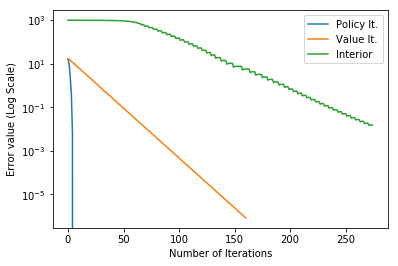

In [48]:
nStates = 100
nActions = 10
P_0 = randomMDP(nStates, nActions)
discount = 0.9
reward=np.zeros((nStates,1))
reward[5] = 1
tol = 1e-7
A, b, c = Primal_parameters_2(P_0, discount, reward)
A_c, b_c, c_c = Analytic_center_bounds2(P_0, discount, reward)

polyit_val, bestAction2,error_pol, num_iter_pol, time_pol = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
valit_val, bestAction,error_val, num_iter_val, time_val = valitr(P_0, b, discount,polyit_val, tol) # Value Iteration
start_time = time.time()
res = linprog(c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time_simplex = time.time() - start_time
obj_ecos_p, ecos_val_p, time_ecos_p=ECOS_Primal(A,b,c,tol) # ECOS Primal
obj_scs_p, scs_val_p, time_scs_p=SCS_Primal(A,b,c,tol) # SCS Primal
obj_cvx_p, cvx_val_p, time_cvx_p=CVXOPT_Primal(A,b,c,tol) # CVXOPT Primal
analytical_vals=findAnalyticCenter(A_c,b_c,valit_val+10,T=1000)
interior_val, interior_error, elapsed_int=interiorPoint(A_c, b_c, discount, tol, 0.2, valit_val,1e-3) # Interior Point Method
Plots2(error_pol,error_val,interior_error)

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Value Iteration  | 161  |5.57690 |
| Policy Iteration  | 6  |0.42219 |
| Simplex Method  | 644  |4.38435 |
| ECOS Solver  | 13  |0.019454 |
| SCS Solver  | >1000  |0.18395 |
| CVXOPT Solver  | 13  |0.31425 |
| Barrier Method  | 275  |222.49 |
| Projected Gradient Descent | NA | NA |
| Acc Projected Gradient Descent  | NA |NA |